# DBSCAN

In [133]:
from sklearn.datasets import make_moons
from sklearn.cluster import DBSCAN
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
import numpy as np

## Load the data

In [19]:
X, y = make_moons(n_samples=1000, noise=0.05)

In [20]:
X.shape

(1000, 2)

In [21]:
y.shape

(1000,)

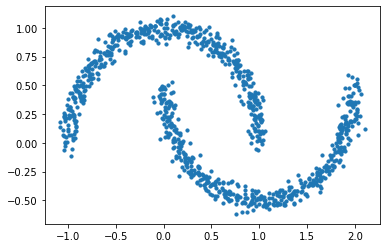

In [122]:
plt.scatter(X[:, 0], X[:, 1], s=10)
plt.show()

## Fit the model

In [101]:
dbscan = DBSCAN(eps=0.05, min_samples=5)
dbscan.fit(X)

DBSCAN(eps=0.05)

In [68]:
dbscan.labels_

array([ 0,  0,  1,  0,  2,  2,  3,  0,  4,  3,  0,  0,  5,  0,  0,  3,  0,
        0,  0,  3,  0,  4,  0,  5,  1,  6,  0,  5,  3,  3,  7,  7,  0,  7,
        3,  0,  4, -1,  0, -1,  0,  3,  5, -1, -1,  5,  0,  0,  0,  0,  0,
        1,  0,  0,  4,  0,  0, -1,  1,  0,  1,  1,  4,  0,  0,  0,  0,  0,
        0,  0,  2,  0,  1,  0,  0,  0,  0,  0,  1, -1,  6,  0,  0,  0,  0,
        8,  0,  6, -1, -1,  3,  3,  0,  4,  9,  0,  4,  1,  7,  0,  2,  0,
        0,  0,  0,  0,  0,  0,  0, -1,  5,  3,  3,  0,  6,  0,  0, -1,  5,
        1,  0,  0,  0,  0,  0,  0,  0,  0,  2,  2,  5, -1,  3,  0,  4,  3,
        0,  1,  0,  5,  4,  0,  7,  4,  0, -1,  0,  0,  3,  4,  4,  0,  0,
        0, -1,  3,  0,  0,  0,  0,  4,  0,  1, -1,  7,  2,  0,  0,  0,  0,
        0,  0,  0,  0,  7,  0,  0,  0,  7,  0, -1,  2,  0,  4,  0,  0,  0,
        0,  2,  6,  3,  0,  8,  7,  3, 10,  0,  0,  0,  0,  4,  6,  4, -1,
        0,  0,  5,  3,  2,  0, -1,  0,  0,  3,  3,  0,  0,  0,  2,  0,  0,
       -1,  0,  0,  5,  0

In [69]:
dbscan.labels_.shape

(1000,)

Labels `-1` correspond to anomalies while all non-negative values correspond to the cluster to which the instance is assigned.

### Core instances

The core instance indeces are given as follows:

In [87]:
dbscan.core_sample_indices_

array([  0,   1,   2,   3,   5,   6,   7,   8,  10,  11,  12,  13,  14,
        15,  16,  17,  18,  19,  20,  22,  23,  24,  25,  26,  27,  28,
        29,  32,  33,  34,  35,  36,  38,  41,  42,  45,  46,  47,  48,
        50,  51,  52,  53,  54,  55,  56,  58,  59,  60,  61,  62,  63,
        64,  65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  76,  77,
        78,  80,  81,  82,  83,  84,  85,  86,  87,  90,  92,  93,  94,
        95,  96,  97,  98,  99, 100, 101, 102, 103, 104, 105, 106, 107,
       108, 110, 111, 112, 113, 114, 115, 116, 118, 119, 120, 121, 123,
       124, 125, 126, 127, 129, 130, 132, 133, 134, 135, 136, 137, 138,
       139, 140, 141, 142, 143, 144, 146, 148, 149, 150, 151, 152, 153,
       155, 156, 158, 159, 160, 161, 162, 164, 167, 168, 169, 170, 171,
       173, 174, 176, 177, 178, 181, 182, 183, 184, 185, 186, 187, 188,
       189, 190, 191, 193, 195, 196, 197, 198, 199, 200, 201, 202, 204,
       205, 206, 207, 209, 212, 213, 214, 215, 216, 217, 218, 21

In [71]:
dbscan.core_sample_indices_.shape

(786,)

And the core instances themselves are given as:

In [72]:
dbscan.components_

array([[ 0.0092943 ,  0.31280809],
       [ 0.09418784,  0.32189191],
       [ 0.9842721 ,  0.14564605],
       ...,
       [ 1.87638035,  0.13504665],
       [ 1.30648416, -0.46183638],
       [ 0.99783227,  0.02079619]])

In [73]:
dbscan.components_.shape

(786, 2)

In this example, roughly 80% of instances are core instances, while 20% of instances are considered as anomalies.

## Plot of the clustering

Each point in the plot corresponds to one instance. Different colors represent different clusters. The black crosses denote all instances which correspond to anomalies.

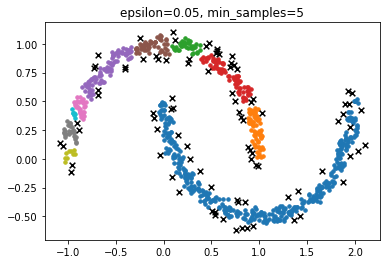

In [102]:
plt.clf()
pointsAreCore = [True if point in dbscan.core_sample_indices_ else False for point in range(len(X))]
for i in range(max(dbscan.labels_)+1):
    pointsInClusterIdx = list((dbscan.labels_ == i))
    selectedPoints = [lis1 & lis2 for (lis1, lis2) in zip(pointsAreCore, pointsInClusterIdx)]
    plt.scatter(X[selectedPoints, 0], X[selectedPoints, 1], s=12)
anomaliesIdx = list((dbscan.labels_ == -1))  
selectedPoints = [(not lis1) & lis2 for (lis1, lis2) in zip(pointsAreCore, anomaliesIdx)]
plt.scatter(X[selectedPoints, 0], X[selectedPoints, 1], s=32, marker="x", c='k')
plt.title('epsilon=0.05, min_samples=5')
plt.show()

Not so bad for the lower half circle; pretty bad for the upper one, though. There are a lot more clusers than what we would have expected, and the clusters do not have the same size.

## Different models with higher epsilon values

We can train another model with higher epsilon value such that neighbooring points have a higher chance of falling into the same cluster.

### Epsilon=0.06

In [119]:
dbscan = DBSCAN(eps=0.06, min_samples=5)
dbscan.fit(X)

DBSCAN(eps=0.06)

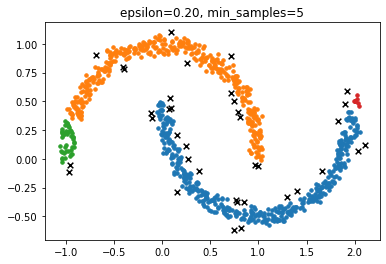

In [120]:
plt.clf()
pointsAreCore = [True if point in dbscan.core_sample_indices_ else False for point in range(len(X))]
for i in range(max(dbscan.labels_)+1):
    pointsInClusterIdx = list((dbscan.labels_ == i))
    selectedPoints = [lis1 & lis2 for (lis1, lis2) in zip(pointsAreCore, pointsInClusterIdx)]
    plt.scatter(X[selectedPoints, 0], X[selectedPoints, 1], s=12)
anomaliesIdx = list((dbscan.labels_ == -1))  
selectedPoints = [(not lis1) & lis2 for (lis1, lis2) in zip(pointsAreCore, anomaliesIdx)]
plt.scatter(X[selectedPoints, 0], X[selectedPoints, 1], s=32, marker="x", c='k')
plt.title('epsilon=0.20, min_samples=5')
plt.show()

Now DBSCAN recognizes four clusters in pairs of two, with each pair having roughly the same size; the size of the clusters in the first pair is a lot higher than for the second pair, though. There are still a few anomalies.

### Epsilon=0.20

In [125]:
dbscan = DBSCAN(eps=0.20, min_samples=5)
dbscan.fit(X)

DBSCAN(eps=0.2)

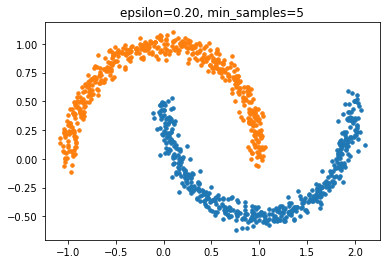

In [126]:
plt.clf()
pointsAreCore = [True if point in dbscan.core_sample_indices_ else False for point in range(len(X))]
for i in range(max(dbscan.labels_)+1):
    pointsInClusterIdx = list((dbscan.labels_ == i))
    selectedPoints = [lis1 & lis2 for (lis1, lis2) in zip(pointsAreCore, pointsInClusterIdx)]
    plt.scatter(X[selectedPoints, 0], X[selectedPoints, 1], s=12)
anomaliesIdx = list((dbscan.labels_ == -1))  
selectedPoints = [(not lis1) & lis2 for (lis1, lis2) in zip(pointsAreCore, anomaliesIdx)]
plt.scatter(X[selectedPoints, 0], X[selectedPoints, 1], s=32, marker="x", c='k')
plt.title('epsilon=0.20, min_samples=5')
plt.show()

Now DBSCAN recognizes two clusters with no anomalies anymore.

## Predictions and decision boundary

Since the DBSCAN implementation in sklearn does not have a .fit method, we can make predictions by using the results stored in the classifier's object `dbscan` and fitting them to another model.

In [128]:
knn = KNeighborsClassifier(n_neighbors=50)
knn.fit(dbscan.components_, dbscan.labels_[dbscan.core_sample_indices_])

KNeighborsClassifier(n_neighbors=50)

### Make predictions for additional points

In [158]:
X_add = np.array([
    [-0.5, 0.0],
    [0.0, 0.5],
    [1.0, -0.1],
    [2.0, 1.0]
])

In [159]:
knn.predict(X_add)

array([1, 0, 1, 0], dtype=int64)

In [160]:
knn.predict_proba(X_add)

array([[0.2 , 0.8 ],
       [1.  , 0.  ],
       [0.16, 0.84],
       [1.  , 0.  ]])

### Plot the decision boundary

In [171]:
resolution = 0.05
x1_min = min(X[:, 0])-0.2
x1_max = max(X[:, 0])+0.2
x2_min = min(X[:, 1])-0.2
x2_max = max(X[:, 1])+0.2
xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution), np.arange(x2_min, x2_max, resolution))
ZZ = knn.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
ZZ = ZZ.reshape(xx1.shape)

Text(0, 0.5, 'x2')

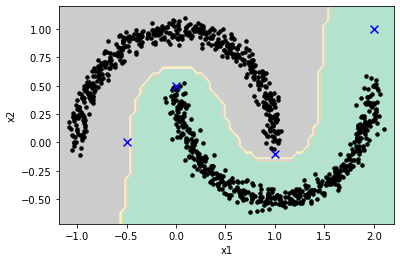

In [174]:
plt.clf()
plt.contourf(xx1, xx2, ZZ, cmap='Pastel2')
plt.scatter(X[:, 0], X[:, 1], s=12, c='k')
plt.scatter(X_add[:, 0], X_add[:, 1], s=62, c='b', marker='x')
plt.xlim(x1_min+0.1, x1_max-0.1)
plt.ylim(x2_min+0.1, x2_max-0.1)
plt.xlabel('x1')
plt.ylabel('x2')